In [7]:
from nltk.metrics import edit_distance
from sklearn.cluster import AgglomerativeClustering
from nltk.stem.porter import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from os.path import commonprefix

def mismatchIndex(x,y):
    i = 0
    while i < len(x) and i < len(y) and x[i] == y[i]:
        i+=1
        
    return i

def distanceD1(x,y):
    distance = 0
    value = 1
    for i in range(max(len(x),len(y))):
        if i >= len(x) or i >= len(y) or x[i]!=y[i]:
            distance+=(1/value)
        value*=2
            
    return distance
            
def distanceD2(x,y):
    distance = 0
    m = mismatchIndex(x,y)
    
    if m == 0:
        return float('inf')
    
    for i in range(m,max(len(x),len(y))):
        distance+=(1/(2**(i-m)))
        
    return distance/m

def distanceD3(x,y):
    m = mismatchIndex(x,y)
    if m == 0:
        return float('inf')
    return  ( max(len(x),len(y)) - m  ) * distanceD2(x,y)

def distanceD4(x,y):
    m = mismatchIndex(x,y)
    if m == 0:
        return float('inf')
    return  (m/(max(len(x),len(y)))) * distanceD3(x,y)
    
 

In [4]:
distanceD1('astronomer','astonish'),distanceD1('astronomer','astronomically')

(0.248046875, 0.0076904296875)

In [8]:
distanceD2('astronomer','astonish'),distanceD2('astronomer','astronomically')

(0.6614583333333334, 0.24609375)

In [18]:
distanceD3('astronomer','astonish'),distanceD3('astronomer','astronomically')

(4.630208333333334, 1.4765625)

In [20]:
distanceD4('astronomer','astonish'),distanceD4('astronomer','astronomically')

(1.3890625, 0.84375)

In [24]:
edit_distance('astronomer','astonish'),edit_distance('astronomer','astronomically')

(5, 6)

In [11]:
list_of_words = []
with open('stemming-assignment.txt') as f:
    list_of_words = f.readlines()
word_list = [i[:-1] for i in list_of_words] 

In [3]:
len(word_list)

23531

# Clustering using D1

In [ ]:
f = open("/content/gdrive/My Drive/Information_Retrieval/D1_matrix.csv",'a')

for i in range(len(word_list)):
    l = []
    for j in range(len(word_list)): 
        if i!=j:
            l.append(str(distanceD1(word_list[i],word_list[j])))
        else:
            l.append(str(0))
    s = ",".join(l)+"\n"
    f.write(s)

f.close()

In [ ]:
data_ = pd.read_csv('/content/gdrive/My Drive/Information_Retrieval/D1_matrix.csv',header = None)

In [ ]:
D1_matrix = data_.apply(pd.to_numeric)

In [3]:
threshold_values = np.arange(0,0.46,0.01)

In [ ]:

threshold_map = dict()
for threshold in threshold_values:
  agg_clustering = AgglomerativeClustering(n_clusters = None,linkage='complete',affinity='precomputed',distance_threshold = threshold)
  agg_clustering.fit(D1_matrix)
  number_of_clusters = agg_clustering.n_clusters_
  cluster_labels = agg_clustering.labels_
  threshold_map[threshold] = [number_of_clusters,cluster_labels]

In [ ]:
#Dump the mapping of the threshold and the clusters in pickle file
with open('D1_cluster_data.pickle', 'wb') as handle:
    pickle.dump(threshold_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
threshold_map = dict()
with open('D1_cluster_data.pickle', 'rb') as handle:
    threshold_map = pickle.load(handle)

In [6]:
number_of_clusters = []

for i in threshold_values:
  number_of_clusters.append(threshold_map[i][0])

Text(0.5, 1.0, 'Distance D1')

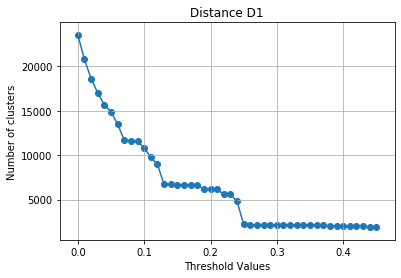

In [8]:
plt.grid()
plt.plot(threshold_values,number_of_clusters)
plt.scatter(threshold_values,number_of_clusters)
plt.xlabel("Threshold Values")
plt.ylabel("Number of clusters")
plt.title("Distance D1")

In [9]:
threshold_map

{0.0: [23531,
  array([17087, 16383, 16055, ...,     6,     2,     0], dtype=int64)],
 0.01: [20797,
  array([17087, 16383, 16055, ...,  7796,   877,  3599], dtype=int64)],
 0.02: [18603,
  array([17087, 16383, 16055, ..., 15593,  3511,  7199], dtype=int64)],
 0.03: [17018,
  array([ 8543, 16383, 16055, ..., 15593,  7024,  7199], dtype=int64)],
 0.04: [15647,
  array([ 8543,  8191,  8027, ..., 15593,  7024, 14399], dtype=int64)],
 0.05: [14897,
  array([ 8543,  8191,  8027, ...,  7796,  7024, 14399], dtype=int64)],
 0.06: [13507, array([8543, 8191, 8027, ..., 7796, 1755, 7199], dtype=int64)],
 0.07: [11664, array([8543, 8191, 8027, ..., 7796, 3511, 7199], dtype=int64)],
 0.08: [11626, array([8543, 8191, 8027, ..., 7796, 3511, 7199], dtype=int64)],
 0.09: [11559, array([8543, 8191, 8027, ..., 7796, 3511, 7199], dtype=int64)],
 0.1: [10812, array([8543, 8191, 8027, ..., 7796, 3511, 7199], dtype=int64)],
 0.11: [9782, array([8543, 8191, 8027, ..., 7796, 3511, 7199], dtype=int64)],
 0.12: 

In [12]:
threshold = 0.05
cluster_words_mapping = dict()
cluster_lables = threshold_map[threshold][1]

for i in range(len(cluster_lables)):
  if cluster_words_mapping.get(cluster_lables[i]) == None:
    cluster_words_mapping[cluster_lables[i]] = [word_list[i]]
  else:
    cluster_words_mapping[cluster_lables[i]].append(word_list[i])

In [13]:
word_root_word_mapping = dict()
for k,v in cluster_words_mapping.items():
  root_word = commonprefix(v)
  for word in v:
    word_root_word_mapping[word] = root_word

In [ ]:
count = 0
for word in word_list:
    stemmer = PorterStemmer()
    
    if word_root_word_mapping[word] == stemmer.stem(word):
        count+=1
        
    print("Original Word: ",word," | Stemming using D1: ",word_root_word_mapping[word]," | Stemming using Porter Stemmer: ",stemmer.stem(word))
    print("*"*100)
    

# Clustering using D2

In [ ]:
d2_matrix = np.zeros((23531,23531))
for i in range(23531):
    for j in range(23531): 
        if i == j:
            d2_matrix[i][j] = 0
        elif d2_matrix[j][i] > 0:
            d2_matrix[i][j] = d2_matrix[j][i]
        else:
          d2_matrix[i][j] = distanceD2(word_list[i],word_list[j])

In [ ]:
dataframe = pd.DataFrame(d2_matrix)
dataframe.to_csv("/content/gdrive/My Drive/Information_Retrieval/D2_matrix.csv")
data_D2 = pd.read_csv('/content/gdrive/My Drive/Information_Retrieval/D2_matrix.csv',header = None)

In [ ]:
D2_matrix = data_D2.apply(pd.to_numeric)

In [ ]:
D2_matrix = D2_matrix.replace(to_replace =float('inf'), 
                 value =np.finfo(np.float64).max)

In [23]:
threshold_values = np.arange(0,0.9,0.01)

In [ ]:
threshold_map = dict()
for threshold in threshold_values:
  agg_clustering = AgglomerativeClustering(n_clusters = None,linkage='complete',affinity='precomputed',distance_threshold = threshold)
  agg_clustering.fit(D2_matrix)
  number_of_clusters = agg_clustering.n_clusters_
  cluster_labels = agg_clustering.labels_
  threshold_map[threshold] = [number_of_clusters,cluster_labels]

In [ ]:
with open('/content/gdrive/My Drive/Information_Retrieval/D2_cluster_data.pickle', 'wb') as handle:
    pickle.dump(threshold_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
threshold_map = dict()
with open('D2_cluster_data.pickle', 'rb') as handle:
    threshold_map = pickle.load(handle)

In [26]:
number_of_clusters = []
for i in threshold_values:
  number_of_clusters.append(threshold_map[i][0]) 

Text(0.5, 1.0, 'Distance D2')

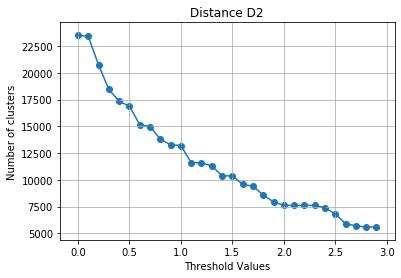

In [39]:
plt.grid()
plt.plot(threshold_values,number_of_clusters)
plt.scatter(threshold_values,number_of_clusters)
plt.xlabel("Threshold Values")
plt.ylabel("Number of clusters")
plt.title("Distance D2")

In [28]:
threshold_map

{0.0: [23531,
  array([23530, 20564, 23529, ...,     6,     2,     0], dtype=int64)],
 0.01: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.02: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.03: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.04: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.05: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.06: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.07: [12602,
  array([ 8447,  8447, 11667, ...,     1,     0,     0], dtype=int64)],
 0.08: [12599,
  array([ 8447,  8447, 11667, ...,     4,     7,     7], dtype=int64)],
 0.09: [12594,
  array([ 8447,  8447, 11667, ...,    10,    31,    31], dtype=int64)],
 0.1: [12581,
  array([ 8447,  8447, 11667, ...,    45,    64,    64], dtype=int64)],
 0.11: [12562,
  array([ 8447,  8447, 11667, 

In [29]:
list_of_clusters_and_their_words = []
threshold = 0.01
cluster_words_mapping = dict()
cluster_lables = threshold_map[threshold][1]

for i in range(len(cluster_lables)):
  if cluster_words_mapping.get(cluster_lables[i]) == None:
    cluster_words_mapping[cluster_lables[i]] = [word_list[i]]
  else:
    cluster_words_mapping[cluster_lables[i]].append(word_list[i])

In [30]:
word_root_word_mapping = dict()
for k,v in cluster_words_mapping.items():
  root_word = commonprefix(v)
  for word in v:
    word_root_word_mapping[word] = root_word

In [ ]:
count = 0
for word in word_list:
    stemmer = PorterStemmer()
    
    if word_root_word_mapping[word] == stemmer.stem(word):
        count+=1
        
    print("Original Word: ",word," | Stemming using D2: ",word_root_word_mapping[word]," | Stemming using Porter Stemmer: ",stemmer.stem(word))
    print("*"*100)

# Clustering using D3

In [ ]:
d3_matrix = np.zeros((23531,23531))
for i in range(23531):
    for j in range(23531): 
        if i == j:
            d3_matrix[i][j] = 0
        elif d3_matrix[j][i] > 0:
            d3_matrix[i][j] = d3_matrix[j][i]
        else:
          d3_matrix[i][j] = distanceD3(word_list[i],word_list[j])

In [ ]:
dataframe = pd.DataFrame(d3_matrix)
dataframe.to_csv("/content/gdrive/My Drive/Information_Retrieval/D3_matrix.csv")
data_D3 = pd.read_csv('/content/gdrive/My Drive/Information_Retrieval/D3_matrix.csv',header = None)

In [ ]:
D3_matrix = data_D3.apply(pd.to_numeric)

In [35]:
threshold_values = np.arange(0,3,0.1)

In [ ]:
threshold_map = dict()
for threshold in threshold_values:
  agg_clustering = AgglomerativeClustering(n_clusters = None,linkage='complete',affinity='precomputed',distance_threshold = threshold)
  agg_clustering.fit(D3_matrix)
  number_of_clusters = agg_clustering.n_clusters_
  cluster_labels = agg_clustering.labels_
  threshold_map[threshold] = [number_of_clusters,cluster_labels]

In [ ]:
with open('/content/gdrive/My Drive/Information_Retrieval/D3_cluster_data.pickle', 'wb') as handle:
    pickle.dump(threshold_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
threshold_map = dict()
with open('D3_cluster_data.pickle', 'rb') as handle:
    threshold_map = pickle.load(handle)

In [36]:
number_of_clusters = []
for i in threshold_values:
  number_of_clusters.append(threshold_map[i][0]) 

Text(0.5, 1.0, 'Distance D3')

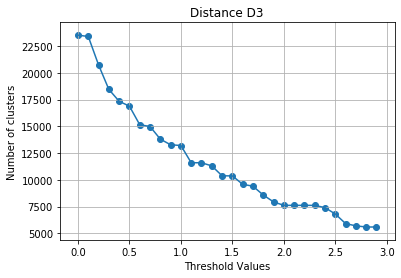

In [40]:
plt.grid()
plt.plot(threshold_values,number_of_clusters)
plt.scatter(threshold_values,number_of_clusters)
plt.xlabel("Threshold Values")
plt.ylabel("Number of clusters")
plt.title("Distance D3")

In [41]:
threshold_map

{0.0: [23531,
  array([13210, 15375, 15055, ...,     6,     2,     0], dtype=int64)],
 0.1: [23407,
  array([13210, 15375, 15055, ...,   235,   116,    16], dtype=int64)],
 0.2: [20743,
  array([13210, 15375, 15055, ...,  3786,  3765,  1119], dtype=int64)],
 0.30000000000000004: [18456,
  array([13210, 15375, 15055, ...,  3786,  3765,  4479], dtype=int64)],
 0.4: [17347,
  array([13210, 15375, 15055, ...,  3786,  3765,  4479], dtype=int64)],
 0.5: [16887,
  array([13210, 15375, 15055, ...,  3786,  3765,  4479], dtype=int64)],
 0.6000000000000001: [15154,
  array([13210,  7687, 15055, ...,  3786,  7531,  8959], dtype=int64)],
 0.7000000000000001: [14988,
  array([13210,  7687,  7527, ...,  3786,  7531,  8959], dtype=int64)],
 0.8: [13806,
  array([13210,  7687,  7527, ...,  3786,  7531,  8959], dtype=int64)],
 0.9: [13279,
  array([13210,  7687,  7527, ...,  3786,  7531,  8959], dtype=int64)],
 1.0: [13211,
  array([13210,  7687,  7527, ...,  3786,  7531,  8959], dtype=int64)],
 1.1: [1

In [42]:
list_of_clusters_and_their_words = []
threshold = 0.7000000000000001
cluster_words_mapping = dict()
cluster_lables = threshold_map[threshold][1]

for i in range(len(cluster_lables)):
  if cluster_words_mapping.get(cluster_lables[i]) == None:
    cluster_words_mapping[cluster_lables[i]] = [word_list[i]]
  else:
    cluster_words_mapping[cluster_lables[i]].append(word_list[i])

In [43]:
word_root_word_mapping = dict()
for k,v in cluster_words_mapping.items():
  root_word = commonprefix(v)
  for word in v:
    word_root_word_mapping[word] = root_word

In [ ]:
count = 0
for word in word_list:
    stemmer = PorterStemmer()
    
    if word_root_word_mapping[word] == stemmer.stem(word):
        count+=1
        
    print("Original Word: ",word," | Stemming using D3: ",word_root_word_mapping[word]," | Stemming using Porter Stemmer: ",stemmer.stem(word))
    print("*"*100)

# Clustering using D4

In [ ]:
d4_matrix = np.zeros((23531,23531))
for i in range(23531):
    for j in range(23531): 
        if i == j:
            d4_matrix[i][j] = 0
        elif d4_matrix[j][i] > 0:
            d4_matrix[i][j] = d4_matrix[j][i]
        else:
          d4_matrix[i][j] = distanceD4(word_list[i],word_list[j])

In [ ]:
dataframe = pd.DataFrame(d4_matrix)
dataframe.to_csv("/content/gdrive/My Drive/Information_Retrieval/D4_matrix.csv")
data_D4 = pd.read_csv('/content/gdrive/My Drive/Information_Retrieval/D4_matrix.csv',header = None)

In [ ]:
D4_matrix = data_D4.apply(pd.to_numeric)

In [46]:
threshold_values = np.arange(0.2,1,0.02)

In [ ]:
threshold_map = dict()
for threshold in threshold_values:
  agg_clustering = AgglomerativeClustering(n_clusters = None,linkage='complete',affinity='precomputed',distance_threshold = threshold)
  agg_clustering.fit(D4_matrix)
  number_of_clusters = agg_clustering.n_clusters_
  cluster_labels = agg_clustering.labels_
  threshold_map[threshold] = [number_of_clusters,cluster_labels]

In [ ]:
with open('/content/gdrive/My Drive/Information_Retrieval/D4_cluster_data.pickle', 'wb') as handle:
    pickle.dump(threshold_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
threshold_map = dict()
with open('D4_cluster_data.pickle', 'rb') as handle:
    threshold_map = pickle.load(handle)

In [48]:
number_of_clusters = []
for i in threshold_values:
  number_of_clusters.append(threshold_map[i][0]) 

Text(0.5, 1.0, 'Distance D4')

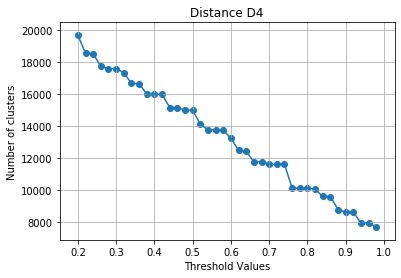

In [49]:
plt.grid()
plt.plot(threshold_values,number_of_clusters)
plt.scatter(threshold_values,number_of_clusters)
plt.xlabel("Threshold Values")
plt.ylabel("Number of clusters")
plt.title("Distance D4")

In [50]:
threshold_map

{0.2: [19686,
  array([14990, 10703, 15043, ..., 10251,  4032, 10947], dtype=int64)],
 0.22: [18547,
  array([14990, 10703, 15043, ..., 10251,  8065, 10947], dtype=int64)],
 0.24: [18521,
  array([14990, 10703, 15043, ..., 10251,  8065, 10947], dtype=int64)],
 0.26: [17733,
  array([14990, 10703, 15043, ..., 10251,  8065, 10947], dtype=int64)],
 0.27999999999999997: [17590,
  array([14990, 10703, 15043, ..., 10251, 16132, 10947], dtype=int64)],
 0.29999999999999993: [17590,
  array([14990, 10703, 15043, ..., 10251, 16132, 10947], dtype=int64)],
 0.31999999999999995: [17347,
  array([14990, 10703, 15043, ..., 10251, 16132, 10947], dtype=int64)],
 0.33999999999999997: [16662,
  array([14990, 10703, 15043, ..., 10251, 16132, 10947], dtype=int64)],
 0.35999999999999993: [16658,
  array([14990, 10703, 15043, ..., 10251, 16132, 10947], dtype=int64)],
 0.3799999999999999: [16005,
  array([14990, 10703, 15043, ..., 10251,  8065, 10947], dtype=int64)],
 0.3999999999999999: [16005,
  array([1499

In [51]:
list_of_clusters_and_their_words = []
threshold = 0.47999999999999987
cluster_words_mapping = dict()
cluster_lables = threshold_map[threshold][1]

for i in range(len(cluster_lables)):
  if cluster_words_mapping.get(cluster_lables[i]) == None:
    cluster_words_mapping[cluster_lables[i]] = [word_list[i]]
  else:
    cluster_words_mapping[cluster_lables[i]].append(word_list[i])

In [52]:
word_root_word_mapping = dict()
for k,v in cluster_words_mapping.items():
  root_word = commonprefix(v)
  for word in v:
    word_root_word_mapping[word] = root_word

In [ ]:
count = 0
for word in word_list:
    stemmer = PorterStemmer()
    
    if word_root_word_mapping[word] == stemmer.stem(word):
        count+=1
        
    print("Original Word: ",word," | Stemming using D4: ",word_root_word_mapping[word]," | Stemming using Porter Stemmer: ",stemmer.stem(word))
    print("*"*100)

# Clustering using Levenstein distance

In [ ]:
Levenstein_distance_matrix = np.zeros((23531,23531))
for i in range(23531):
    for j in range(23531): 
        if i == j:
            Levenstein_distance_matrix[i][j] = 0
        elif Levenstein_distance_matrix[j][i] > 0:
            Levenstein_distance_matrix[i][j] = Levenstein_distance_matrix[j][i]
        else:
          Levenstein_distance_matrix[i][j] = edit_distance(word_list[i],word_list[j])

In [ ]:
dataframe = pd.DataFrame(Levenstein_distance_matrix)
dataframe.to_csv("/content/gdrive/My Drive/Information_Retrieval/Levenstein_distance_matrix.csv")
data_Levenstein_distance = pd.read_csv('/content/gdrive/My Drive/Information_Retrieval/Levenstein_distance_matrix.csv',header = None)

In [ ]:
Levenstein_distance_matrix = data_Levenstein_distance.apply(pd.to_numeric)

In [60]:
threshold_values = np.arange(1,28,1)

In [ ]:
threshold_map = dict()
for threshold in threshold_values:
  agg_clustering = AgglomerativeClustering(n_clusters = None,linkage='complete',affinity='precomputed',distance_threshold = threshold)
  agg_clustering.fit(Levenstein_distance_matrix)
  number_of_clusters = agg_clustering.n_clusters_
  cluster_labels = agg_clustering.labels_
  threshold_map[threshold] = [number_of_clusters,cluster_labels]

In [ ]:
with open('/content/gdrive/My Drive/Information_Retrieval/Levenstein_distance_data.pickle', 'wb') as handle:
    pickle.dump(threshold_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [61]:
threshold_map = dict()
with open('Levenstein_distance_cluster_data.pickle', 'rb') as handle:
    threshold_map = pickle.load(handle)

In [62]:
number_of_clusters = []
for i in threshold_values:
  number_of_clusters.append(threshold_map[i][0]) 

Text(0.5, 1.0, 'Distance Levenstein distance')

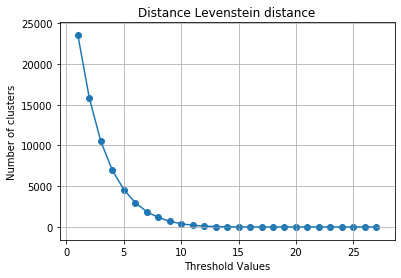

In [63]:
plt.grid()
plt.plot(threshold_values,number_of_clusters)
plt.scatter(threshold_values,number_of_clusters)
plt.xlabel("Threshold Values")
plt.ylabel("Number of clusters")
plt.title("Distance Levenstein distance")

In [64]:
threshold_map

{1: [23531,
  array([23530, 23529, 20997, ...,     3,     1,     0], dtype=int64)],
 2: [15815,
  array([ 5069, 13150, 10498, ...,  1549,  1043,  2421], dtype=int64)],
 3: [10499,
  array([   82,  6932, 10498, ...,  1413,  1110,  4844], dtype=int64)],
 4: [6973, array([   7, 3342, 4016, ..., 4609, 1732, 1703], dtype=int64)],
 5: [4600, array([   0,  907, 4016, ...,    0, 1732, 3408], dtype=int64)],
 6: [2986, array([   0, 1045,  877, ...,    0,  445,  316], dtype=int64)],
 7: [1886, array([   0,  932, 1755, ...,    0,  598, 1269], dtype=int64)],
 8: [1180, array([  0, 392, 563, ...,   0,  95,  95], dtype=int64)],
 9: [709, array([  0,  49, 159, ...,   0, 103, 103], dtype=int64)],
 10: [397, array([  0,   0, 156, ...,   0,  13,  13], dtype=int64)],
 11: [222, array([ 0,  0, 28, ...,  0,  0,  0], dtype=int64)],
 12: [114, array([ 0,  0, 17, ...,  0,  0,  0], dtype=int64)],
 13: [58, array([ 0,  0, 14, ...,  0,  0,  0], dtype=int64)],
 14: [25, array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [65]:
list_of_clusters_and_their_words = []
threshold = 2
cluster_words_mapping = dict()
cluster_lables = threshold_map[threshold][1]

for i in range(len(cluster_lables)):
  if cluster_words_mapping.get(cluster_lables[i]) == None:
    cluster_words_mapping[cluster_lables[i]] = [word_list[i]]
  else:
    cluster_words_mapping[cluster_lables[i]].append(word_list[i])

In [66]:
word_root_word_mapping = dict()
for k,v in cluster_words_mapping.items():
  root_word = commonprefix(v)
  for word in v:
    word_root_word_mapping[word] = root_word

In [69]:
len(word_root_word_mapping)

23531

In [ ]:
count = 0
for word in word_list:
    stemmer = PorterStemmer()
    
    if word_root_word_mapping[word] == stemmer.stem(word):
        count+=1
        
    print("Original Word: ",word," | Stemming using Levenstein distance: ",word_root_word_mapping[word]," | Stemming using Porter Stemmer: ",stemmer.stem(word))
    print("*"*100)